In [1]:
# data -? data pre processing -> data analysis -> Optimum number of Clusters -> K means clusterin -> Visualizing the clusters.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv("/content/drive/MyDrive/datasets/Mall_Customers.csv")
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [6]:
# checking null status of all features.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# checking for missing values

data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
# relevant data is the last two values so we are taking those two inputs.

X = data.iloc[:, [3, 4]].values

In [9]:
X[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

## We will use WCSS,
Within-cluster sum of squares (WCSS), also known as inertia, is a metric in cluster analysis that measures the compactness of clusters. It quantifies the sum of the squared distances between each data point and the centroid of its assigned cluster. A smaller WCSS indicates that data points within a cluster are closer to their centroid, implying a more compact and cohesive cluster. WCSS is used to evaluate the quality of clustering, especially in algorithms like k-means, where the goal is to minimize WCSS.

In [12]:
# choosing the number of clusters.

# first we will use elbow method

wcss = []

# we will be taking clusters number from 1 till 10
for i in range(1, 10 + 1):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) # inertia will give us wcss value for each clusters


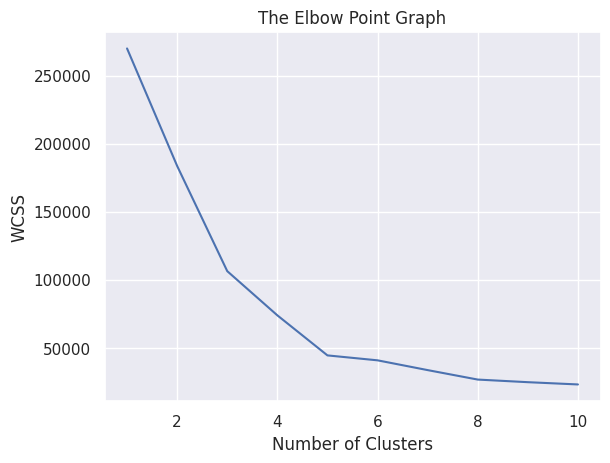

In [13]:
# plotting an elbow graph

sns.set()
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
# we will take the point 5 as our elbow point, since after this there is no significant drop

# setting up the cluster number as 5

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# naming/labelling each clusters.

Y = kmeans.fit_predict(X)

print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


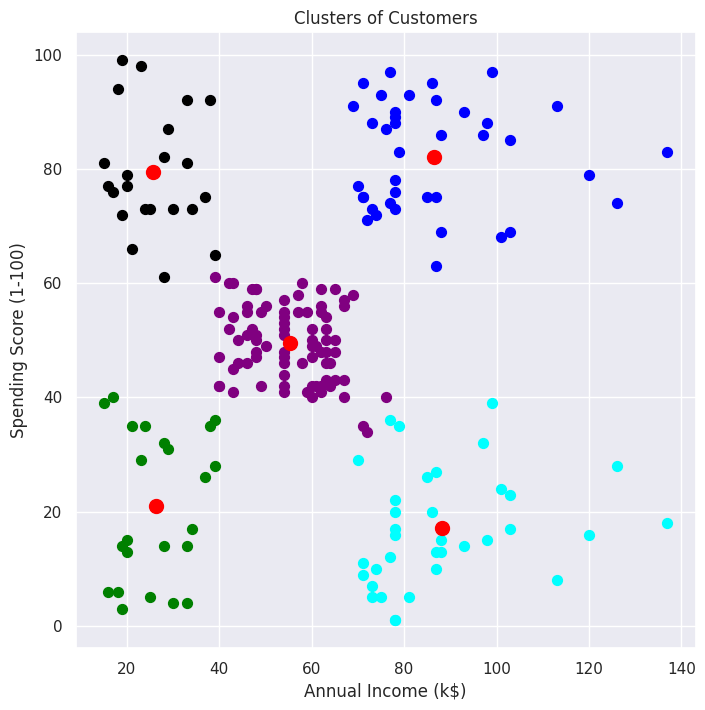

In [16]:
# visualizing the cluster

plt.figure(figsize=(8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0,1], s=50, c="purple", label="Cluster 1") # y==0,0 second 0 is annual income, y==0,1 second 1 is spending
plt.scatter(X[Y == 1, 0], X[Y == 1,1], s=50, c="blue", label="Cluster 2") # s is size of the dots.
plt.scatter(X[Y == 2, 0], X[Y == 2,1], s=50, c="black", label="Cluster 3")
plt.scatter(X[Y == 3, 0], X[Y == 3,1], s=50, c="cyan", label="Cluster 4")
plt.scatter(X[Y == 4, 0], X[Y == 4,1], s=50, c="green", label="Cluster 5")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="red", label="Centroids")

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()